# SSC Data Science and Analytics Workshop 2021

## The Data Scientist’s Workflow: EDA and Statistical Modeling with Python in Jupyter Notebooks

# Topics

- Data wrangling: 
   - selecting variables
   - filtering rows
   - creating new variables
   - grouping
   - combining multiple data frames

- Summarizing Data 
- Visualizing Data


# Data Wrangling

- Data wrangling/manipulation/transformation has a large impact on the data used to answer questions with data.

- Statistical and machine learning models are meaningful only if the data is meaningful.

- Data wrangling/manipulation is one point in the data analysis process where decisions can introduce bias into the data.  Examples?

<a href='https://www.nytimes.com/interactive/2019/01/11/us/politics/trump-border-crisis-reality.html'> <img src='trumpnyt.png'> </img> </a>

![](pandas_screenshot.png)

# Series

A Series is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its index. The simplest Series is formed from only an array of data

In [5]:
import pandas as pd

myseries = pd.Series([0.9, 0.7, -10, 20])
print(myseries)
prov = ['Manitoba', 'Ontario', 'Quebec', 'Alberta']
myseries.index = prov
myseries

0     0.9
1     0.7
2   -10.0
3    20.0
dtype: float64


Manitoba     0.9
Ontario      0.7
Quebec     -10.0
Alberta     20.0
dtype: float64

- `myseries` is now indexed by `prov`.
- the value for Alberta can be obtained by `myseries['Alberta']`

<h1> Your turn  &#128073; </h1> 



1. Create a new cell.

2. Access the value for Ontario.

# pandas DataFrame

- A DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). 

- The DataFrame has both a row and column index; it can be thought of as a dict of Series all sharing the same index.

- Under the hood, the data is stored as one or more two-dimensional blocks rather than a list, dict, or some other collection of one-dimensional arrays. 

(McKinney, 2018 and [pandas ref](https://pandas.pydata.org))

- a pandas cheat sheet is available [here](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf).

In [94]:
# a dict of equal lengths

pop = {'province':['Ontario', 'Ontario', 'Quebec', 'Quebec'], 
        'year': [2016, 2011,2016, 2011],
        'pop_size': [13448494, 12851821, 8164361, 7903001]}
df = pd.DataFrame(pop)
df

,province,year,pop_size
0,Ontario,2016,13448494
1,Ontario,2011,12851821
2,Quebec,2016,8164361
3,Quebec,2011,7903001


<h1> Your turn  &#128073; </h1> 



1. Create a new cell, 

2. add this data to `df`,

province | population | year
---------| -----------| -----
Manitoba |  1,278,365 |  2016
Manitoba |  1,208,268 | 2011

3. Display the data frame

- pandas can read and write data in many types of formats (text, binary, SQL) that are stored as csv, json, html, etc.  (see [IO tools](http://pandas.pydata.org/pandas-docs/stable/io.html) )

- For example, `read_html` accepts an HTML string/file/URL and will parse an HTML tables into a list of pandas DataFrames.

# Population of Countries

![text](wikipedia_poppage.png)

In [95]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)'
df = pd.read_html(url, header=0)
type(df)

list

In this case `pd.read_html()` returns a list of data frames.  By inspection, the first element of the list contains the Wikipedia table we want.

In [97]:
pop = df[0] # select table of countries
pop

,Country/Territory,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
0,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
...,...,...,...,...,...,...
229,Falkland Islands (United Kingdom),Americas,South America,3234,3377,+4.42%
230,Niue (New Zealand),Oceania,Polynesia,1620,1615,−0.31%
231,Tokelau (New Zealand),Oceania,Polynesia,1319,1340,+1.59%
232,Vatican City[z],Europe,Southern Europe,801,799,−0.25%


The data is sorted by 2019 world population so we can use index to create a rank variable.

In [98]:
pop.reset_index(inplace = True)
pop = pop.rename(columns = {'index': 'rank'})
pop.head()

,rank,Country/Territory,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
0,0,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%


<h1> Your turn  &#128073; </h1> 

1. Create a new cell.

2. Read the tables from <https://en.wikipedia.org/wiki/List_of_Arab_countries_by_population> into a pandas data frame.

3. Display the data frame with the Past and Future table. 

![](arabcount_screenshot.png)

## Dataframe properties

- data frame dimensions: `pop.shape`

- column names: `list(pop)` or `pop.columns`

In [99]:
print('Shape of the data frame is:', pop.shape) 
print('\n')
print('Column names:',list(pop))

Shape of the data frame is: (234, 7)


Column names: ['rank', 'Country/Territory', 'UN continentalregion[4]', 'UN statisticalsubregion[4]', 'Population(1 July 2018)', 'Population(1 July 2019)', 'Change']


<p> &#9995; Indexing starts from 0 (unlike R &#128560;) so we should add 1 to <code>rank</code>.</p> 

In [100]:
pop['rank'] = pop['rank'].apply(lambda x: x + 1)
pop.head()

,rank,Country/Territory,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
0,1,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,2,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,3,United States,Americas,Northern America,327096265,329064917,+0.60%
3,4,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,5,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%


# Filtering rows (observations)

Select countries with an *index* value between 230 and 234 inclusive

In [101]:
pop[230:234]

,rank,Country/Territory,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
230,231,Niue (New Zealand),Oceania,Polynesia,1620,1615,−0.31%
231,232,Tokelau (New Zealand),Oceania,Polynesia,1319,1340,+1.59%
232,233,Vatican City[z],Europe,Southern Europe,801,799,−0.25%
233,234,World,NaN,NaN,7631091040,7713468100,+1.08%


- Let's remove the last row since it's not a country. 
- Use `DataFrame.drop` and modify the data frame with `inplace = True`.

In [102]:
pop.drop(233, inplace = True)

In [103]:
print('There are', pop.shape[0], 'rows and' ), 
pop[232:]

There are 233 rows and


,rank,Country/Territory,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
232,233,Vatican City[z],Europe,Southern Europe,801,799,−0.25%


# `.loc` and `.iloc`

- Use `.loc` and `.iloc` to select by rows and columns.

- `.loc` is primarily label based.

- `.iloc` is primarily integer based.

- What is the change in population for the country of rank 30?

In [88]:
print('using loc:', pop.loc[29,'Change'], '\n')
print('using iloc:', pop.iloc[29, 6])

using loc: +0.09% 

using iloc: +0.09%


- Modify values in place using `.loc` 

In [89]:
pop.loc[29,'Change'] = 0.09
print(pop.loc[29,'Change']),
type(pop.loc[29,'Change'])

0.09


float

- `iloc` is primarily integer based
- We can also select rows using integers with `iloc`.  For example, the 7th column has index value 7 - 1 = 6 (i.e., from 0 to length of axis - 1).

In [90]:
pop.iloc[29,6]

0.09

# Selecting variables (columns)


- `pop['rank']` returns a pandas series (i.e., data frame with one column).


In [16]:
pop['rank'].head()

0    1
1    2
2    3
3    4
4    5
Name: rank, dtype: int64

**Question:** Which Asian countries are in the top 10 by rank?  What is the distribution of population change in these countries?

In [17]:
print(pop.columns) 
pop[pop.columns[2]].head()

Index(['rank', 'Country/Territory', 'UN continentalregion[4]',
       'UN statisticalsubregion[4]', 'Population(1 July 2018)',
       'Population(1 July 2019)', 'Change'],
      dtype='object')


0        Asia
1        Asia
2    Americas
3        Asia
4        Asia
Name: UN continentalregion[4], dtype: object

In [18]:
t1 = pop.loc[0:2,'Country/Territory':'UN continentalregion[4]']
t2 = pop.iloc[0:3, 0:3]
t3 = pop[['Country/Territory','UN continentalregion[4]']][0:3]
display(t1, t2, t3)


,Country/Territory,UN continentalregion[4]
0,China[a],Asia
1,India,Asia
2,United States,Americas


,rank,Country/Territory,UN continentalregion[4]
0,1,China[a],Asia
1,2,India,Asia
2,3,United States,Americas


,Country/Territory,UN continentalregion[4]
0,China[a],Asia
1,India,Asia
2,United States,Americas


We can also use boolean logic to select rows.

In [19]:
pop[pop.columns[2] == 'Asia' & pop['rank'] <= 10]

TypeError: Cannot perform 'rand_' with a dtyped [int64] array and scalar of type [bool]

In [20]:
pop.dtypes

rank                           int64
Country/Territory             object
UN continentalregion[4]       object
UN statisticalsubregion[4]    object
Population(1 July 2018)        int64
Population(1 July 2019)        int64
Change                        object
dtype: object

object dtype, can hold any Python object, including strings (see [pandas ref](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#defaults)). But, we can to convert variable to a string type using `astype`.

In [23]:
pop[pop.columns[2]].astype('string').head()

0        Asia
1        Asia
2    Americas
3        Asia
4        Asia
Name: UN continentalregion[4], dtype: string

In [104]:
pop[(pop[pop.columns[2]].astype('string') == 'Asia') & (pop['rank'] <= 10)]

,rank,Country/Territory,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
0,1,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,2,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
3,4,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,5,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
7,8,Bangladesh,Asia,Southern Asia,161376708,163046161,+1.03%


`Change` is type object so we will need to: 

1. convert to a string, 
2. extract the digits, 
3. convert digits to type numeric, then  
4. compute distribution.



In [93]:
# notice that the entire expression below is enclosed in () 
# improves readability

(pop[(pop[pop.columns[2]] == 'Asia') & (pop['rank'] <= 10)]['Change'].
astype('string'). # 1. convert to string
str.extract(r'(\d\.\d+|-\d\.\d+)'). # 2. extract decimal digits
astype('float'). # 3. convert to numeric
describe()) # 4. compute distribution

,0
count,5.000000
mean,1.124000
std,0.578991
min,0.430000
25%,1.020000
50%,1.030000
75%,1.100000
max,2.040000


- This is an example where we call methods on an object one after another - sometimes called [method chaining](https://tomaugspurger.github.io/method-chaining).  

- Similar in style to `%>%` in R `tidyverse`.

# Creating New Variables

Suppose we want to add a new variable to the data frame to indicate if a countries' change in population has magnitude greater than 3% (i.e., change $\geq$ 3% or change $\leq$ -3%).


In [26]:
pop['Change'].head(12)

0     +0.43%
1     +1.02%
2     +0.60%
3     +1.10%
4     +2.04%
5     +0.75%
6     +2.60%
7     +1.03%
8     +0.09%
9     +1.10%
10    −0.27%
11    +2.61%
Name: Change, dtype: object

Use `-\d+\.\d+|\d+\.\d+` to extract positive and negative digits.

In [28]:
pop['Change'].astype('string').str.extract(r'(-\d+\.\d+|\d+\.\d+)').head(12)

,0
0,0.43
1,1.02
2,0.60
3,1.10
4,2.04
5,0.75
6,2.60
7,1.03
8,0.09
9,1.10


- Why didn't the regex work for the minus sign?
- Look at unicode character for index 10.

In [105]:
print(ord(pop['Change'].astype('string')[10][0]))
ord('-') # minus sign

8722


45

- Minus sign has integer 45.
- So, need to replace unicode 8722 with unicode 45.

In [30]:
ch1 = ord(pop['Change'].astype('string')[10][0])

pop['Change'] = (pop['Change'].astype('string').
                 str.replace(chr(ch1),'-').
                 str.extract(r'(-\d+\.\d+|\d+\.\d+)')[0].
                 astype(float))

pop['Change']


0      0.43
1      1.02
2      0.60
3      1.10
4      2.04
       ... 
228   -0.08
229    4.42
230   -0.31
231    1.59
232   -0.25
Name: Change, Length: 233, dtype: float64

- Now, need to apply a transformation to select changes between -3 and 3.
- One way to do it is to use `apply` with a `lambda` function.

In [31]:
pop['Change3'] = pop['Change'].apply(lambda x: 1 if (x >= -3.0 and x <= 3.0) else 0)

pop['Change3']

0      1
1      1
2      1
3      1
4      1
      ..
228    1
229    0
230    1
231    1
232    1
Name: Change3, Length: 233, dtype: int64

In [35]:
pop.groupby(['Change3']).count()

,rank,Country/Territory,UN continentalregion[4],UN statisticalsubregion[4],Population(1 July 2018),Population(1 July 2019),Change
Change3,,,,,,,
0,13,13,13,13,13,13,12
1,220,220,220,220,220,220,220


# Statistics Canada Daily Indicators

## How is Canada's Economy today?

![text](statcan1.png)

In [36]:
dailydat = 'https://www150.statcan.gc.ca/n1/dai-quo/ssi/homepage/ind-econ.json'

df = pd.read_json(dailydat)
df.head()

,results
geo,"[{'geo_code': '0', 'label': {'en': 'Canada', '..."
indicators,"[{'registry_number': 3612, 'indicator_number':..."
themes_en,"[{'theme_id': '32', 'label': 'Agriculture and ..."
themes_fr,"[{'theme_id': '44', 'label': 'Adultes âgés et ..."


In [37]:
type(df['results']['indicators'])

list

In [41]:
df['results']['indicators'][0]

{'registry_number': 3612,
 'indicator_number': 1,
 'geo_code': 0,
 'title': {'en': 'Imports of goods', 'fr': 'Importations de biens'},
 'value': {'en': '$49.6 billion', 'fr': '49,6 milliards de dollars'},
 'refper': {'en': 'April 2021', 'fr': 'Avril 2021'},
 'daily_url': {'en': '/daily-quotidien/210608/dq210608a-eng.htm',
  'fr': '/daily-quotidien/210608/dq210608a-fra.htm'},
 'daily_title': {'en': 'Canadian international merchandise trade',
  'fr': 'Commerce international de marchandises du Canada'},
 'source': '12100011',
 'themes': '*12**1201**1203**18**1804**4510**451003*',
 'release_date': '2021-06-08',
 'growth_rate': {'growth': {'en': '-4.7%', 'fr': '-4,7 %'},
  'arrow_direction': 2,
  'details': {'en': '(monthly change)', 'fr': '(variation mensuelle)'}}}

Two ways to flatten the json file.

1. use pandas `json_normalize`

2. iterate through list

In [45]:
indicators = pd.json_normalize(df['results']['indicators'])

In [46]:
indicators.head()

,registry_number,indicator_number,geo_code,source,themes,release_date,title.en,title.fr,value.en,value.fr,...,daily_url.en,daily_url.fr,daily_title.en,daily_title.fr,growth_rate.growth.en,growth_rate.growth.fr,growth_rate.arrow_direction,growth_rate.details.en,growth_rate.details.fr,growth_rate
0,3612,1,0,12100011,*12**1201**1203**18**1804**4510**451003*,2021-06-08,Imports of goods,Importations de biens,$49.6 billion,"49,6 milliards de dollars",...,/daily-quotidien/210608/dq210608a-eng.htm,/daily-quotidien/210608/dq210608a-fra.htm,Canadian international merchandise trade,Commerce international de marchandises du Canada,-4.7%,"-4,7 %",2.0,(monthly change),(variation mensuelle),NaN
1,3612,2,0,12100011,*12**1201**1203**18**1804**4510**451003*,2021-06-08,Exports of goods,Exportations de biens,$50.2 billion,"50,2 milliards de dollars",...,/daily-quotidien/210608/dq210608a-eng.htm,/daily-quotidien/210608/dq210608a-fra.htm,Canadian international merchandise trade,Commerce international de marchandises du Canada,-1.0%,"-1,0 %",2.0,(monthly change),(variation mensuelle),NaN
2,3612,3,0,12100011,*12**1201**1203**18**1804**4510**451003*,2021-06-08,Goods trade balance,Balance commerciale de biens,$594 million,594 millions de dollars,...,/daily-quotidien/210608/dq210608a-eng.htm,/daily-quotidien/210608/dq210608a-fra.htm,Canadian international merchandise trade,Commerce international de marchandises du Canada,NaN,NaN,NaN,NaN,NaN,NaN
3,3587,1,2,14100287,*1402**140205**4510**451002*,2021-06-04,Employment,Emploi,"79,000",79 000,...,/daily-quotidien/210604/dq210604a-eng.htm,/daily-quotidien/210604/dq210604a-fra.htm,Labour Force Survey,Enquête sur la population active,0.4%,"0,4 %",1.0,(monthly change),(variation mensuelle),NaN
4,3313,1,0,36100206,*1401**140199**1404**140401**3606**360601**451...,2021-06-04,Quarterly labour productivity,Productivité trimestrielle du travail,,,...,/daily-quotidien/210604/dq210604b-eng.htm,/daily-quotidien/210604/dq210604b-fra.htm,"Labour productivity, hourly compensation and u...","Productivité du travail, rémunération horaire ...",-1.7%,"-1,7 %",2.0,(quarterly change),(variation trimestrielle),NaN


- Some of the indicators are not reported for all provinces/territories.
- Create a list of indicators in the daily that have at `geo_code` $\ge 1$.

In [56]:
l = list(indicators.groupby(by=['title.en', 'geo_code']).groups)

- Use a list comprehension to create a list of indicators that have at least two geo_codes

In [59]:
titles_weekly = [title for title, geo in l if geo >= 1] # list of titles for each indicator

- remove duplicate titles

In [63]:
res = [] 

[res.append(t) for t in titles_weekly if t not in res] # only keep one copy

res

['Average weekly earnings',
 'Building permits',
 'Capital expenditures: Machinery and equipment',
 'Capital expenditures: Non-residential construction',
 'Employment',
 'Farm cash receipts',
 'Farm operating expenses',
 'Non-residential capital expenditures',
 'Realized net farm income',
 'Regular Employment Insurance beneficiaries',
 'Regular Employment Insurance beneficiaries (year-over-year change)',
 'Retail sales',
 'Total net farm income',
 'Unemployment rate',
 'Wholesale sales']

We want to plot the indicator on a map of Canada s let's create a Chloropleth map.  For this type of map we will need a file with geometry of Canadian provinces and Territories as polygons (i.e., a geojson file).

![](canadageojson.png)

- use names from geojson to create dictionary with `geo_code` from `weeklyearnings` (i.e., used in stats can data).
- merge `weekly_earnings` with `canada_geo`.
- use `geopandas` to import geojson file of Canada then extract names of provinces.
- we will need to merge these names with `geo_code` from `weeklyearnings`.

In [66]:
import geopandas

geourl = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/canada.geojson'

geocanada = geopandas.read_file(geourl)

geocanada.head()

,name,cartodb_id,created_at,updated_at,geometry
0,Quebec,1,2014-10-16T13:22:00+00:00,2014-10-16T13:22:00+00:00,"MULTIPOLYGON (((-78.01917 62.59193, -77.86722 ..."
1,Newfoundland and Labrador,5,2014-10-16T13:22:00+00:00,2014-10-16T13:22:00+00:00,"MULTIPOLYGON (((-55.88306 53.48638, -55.72944 ..."
2,British Columbia,6,2014-10-16T13:22:00+00:00,2014-10-16T13:22:00+00:00,"MULTIPOLYGON (((-131.07710 52.15009, -130.9481..."
3,Nunavut,12,2014-10-16T13:22:00+00:00,2014-10-16T13:22:00+00:00,"MULTIPOLYGON (((-109.97841 78.67106, -109.4053..."
4,Northwest Territories,13,2014-10-16T13:22:00+00:00,2014-10-16T13:22:00+00:00,"MULTIPOLYGON (((-110.39440 78.75221, -109.9784..."


- Create a dictionary where **key** is provience/territory name from geojson, and **value** is `geo_code` value from Statistics Canada data.

In [70]:
geo_dict = {'Canada' : [0], 
            geocanada['name'][1] : [1],
            geocanada['name'][9]: [2],
            geocanada['name'][6] : [3],
            geocanada['name'][5] : [4],
            geocanada['name'][0] : [5],
            geocanada['name'][12] : [6],
            geocanada['name'][11] : [7],
            geocanada['name'][7] : [8],
            geocanada['name'][8] : [9],
            geocanada['name'][2] : [10],
            geocanada['name'][10] : [11],
            geocanada['name'][4] : [12],
            geocanada['name'][3] : [13]}

# index is set as key
canada_geo = pd.DataFrame.from_dict(geo_dict, orient = 'index', columns = ['geo_code'])

# reset index to create a column for province/territory name
canada_geo.reset_index(inplace=True)

# rename column
canada_geo = canada_geo.rename(columns = {'index':'region'})
canada_geo

,region,geo_code
0,Canada,0
1,Newfoundland and Labrador,1
2,Prince Edward Island,2
3,Nova Scotia,3
4,New Brunswick,4
5,Quebec,5
6,Ontario,6
7,Manitoba,7
8,Saskatchewan,8
9,Alberta,9


# Data Visualization

What are the relationships between growth of economic indicators?

Consider the relationship between growth rate of `Building permits` and `Average weekly earnings`.

In [71]:
# growth rate for building permits
indicators[indicators['title.en'] == res[1]][['geo_code','growth_rate.growth.en']].head()

,geo_code,growth_rate.growth.en
26,13,-100.0%
27,12,-91.9%
28,11,348.9%
29,8,16.1%
30,10,-13.6%


In [72]:
indicators['growth_rate.growth.en'].dtypes

dtype('O')

In order to plot `growth_rate.growth.en` need to convert to numeric type. One way to do this is:

1. convert to a string `astype('string')`
2. replace `%` with '' `str.replace('%','')`
3. convert to numeric `pd.to_numeric()`

In [73]:
v1 = indicators[indicators['title.en'] == res[1]][['geo_code','growth_rate.growth.en']]
v1['growth_rate.growth.en'] = pd.to_numeric(v1['growth_rate.growth.en'].astype('string').str.replace('%',''))

v2 = indicators[indicators['title.en'] == res[0]][['geo_code','growth_rate.growth.en']]
v2['growth_rate.growth.en'] = pd.to_numeric(v2['growth_rate.growth.en'].astype('string').str.replace('%',''))

- Merge `v1` and `v2` by `geo_code` then
- Merge the result with `canada_geo` data frame so that we can label points by province names.

In [74]:
df = v1.merge(v2, on = 'geo_code', suffixes = (res[0],res[1])).merge(canada_geo, on = 'geo_code')

Plot the variables using pyplot API from matplotlib `matplotlib.pyplot`.

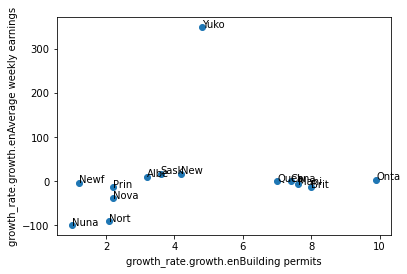

In [75]:
import matplotlib.pyplot as plt

x1 = df[list(df)[2]]
y1 = df[list(df)[1]]

# grab first four letters of provinces
labs = df['region'].astype('string').str.slice(start=0,stop=4)


plt.scatter(x = x1 , y = y1)
plt.xlabel(list(df)[2])
plt.ylabel(list(df)[1])

# add annotation
for i, txt in enumerate(labs):
    plt.annotate(txt, (x1[i], y1[i]), ha = 'left')

Same plot using matplotlib object-oriented API - this API allows finer control over plots.

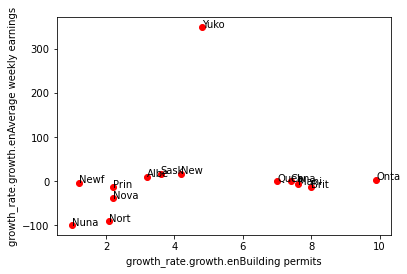

In [76]:
fig, ax = plt.subplots()
ax.plot(x1, y1, 'ro') # red circles
ax.set_xlabel(list(df)[2])
ax.set_ylabel(list(df)[1])
for i, txt in enumerate(labs):
    ax.annotate(txt, (x1[i], y1[i]), ha = 'left')
plt.show()

We could also plot directly using pandas.

<AxesSubplot:xlabel='growth_rate.growth.enBuilding permits', ylabel='growth_rate.growth.enAverage weekly earnings'>

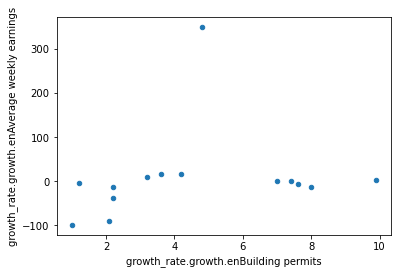

In [77]:
df.plot.scatter(x = list(df)[2],y = list(df)[1])

Define a function to extract two indicators.

In [78]:
def get_two_indicators(i1,i2):
    v1 = indicators[indicators['title.en'] == i1][['geo_code','growth_rate.growth.en']]
    v1['growth_rate.growth.en'] = pd.to_numeric(v1['growth_rate.growth.en'].astype('string').str.replace('%',''))
    v2 = indicators[indicators['title.en'] == i2][['geo_code','growth_rate.growth.en']]
    v2['growth_rate.growth.en'] = pd.to_numeric(v2['growth_rate.growth.en'].astype('string').str.replace('%',''))
    return v1.merge(v2, on = 'geo_code', suffixes = (i2,i1)).merge(canada_geo, on = 'geo_code')
    
get_two_indicators(res[0],res[1])

,geo_code,growth_rate.growth.enBuilding permits,growth_rate.growth.enAverage weekly earnings,region
0,5,7.0,-1.0,Quebec
1,6,9.9,3.3,Ontario
2,7,7.6,-7.1,Manitoba
3,8,3.6,16.1,Saskatchewan
4,9,3.2,9.8,Alberta
5,10,8.0,-13.6,British Columbia
6,11,4.8,348.9,Yukon Territory
7,12,2.1,-91.9,Northwest Territories
8,13,1.0,-100.0,Nunavut
9,3,2.2,-38.9,Nova Scotia


Create a dataframe with four indicators using `get_two_indicators` and `DataFrame.merge`.

In [79]:
ind_basket = ((get_two_indicators(res[0],res[1]).
              merge(get_two_indicators(res[2],res[3]), on = 'geo_code')).
              iloc[:,[1,2,4,5]])
ind_basket.head()

,growth_rate.growth.enBuilding permits,growth_rate.growth.enAverage weekly earnings,growth_rate.growth.enCapital expenditures: Non-residential construction,growth_rate.growth.enCapital expenditures: Machinery and equipment
0,7.0,-1.0,5.0,14.1
1,9.9,3.3,12.9,6.4
2,7.6,-7.1,0.1,0.9
3,3.6,16.1,3.6,3.3
4,3.2,9.8,0.9,6.9


- Let's clean up column names, say by, using the last word.  
- The regex `\s(\w+)$` will extract the last word of the column names.

In [80]:
import re

#put column names in a list
long_names = list(ind_basket)

# search for last word in title and put in a list
short_names = [re.search('\s(\w+)$',col_name).group() for col_name in long_names]

short_names

[' permits', ' earnings', ' construction', ' equipment']

- Now rename columns in data frame with shorter versions.
- Use `pandas.DataFrame.rename`.  
- Need a dictionary of (key:value) pairs, where key = long_names and value = short_names
- `zip` function is an iterator of tuples where first item in each iterator is paired with second item.

In [81]:
short_names_dict = dict(zip(list(ind_basket),short_names))
short_names_dict

{'growth_rate.growth.enBuilding permits': ' permits',
 'growth_rate.growth.enAverage weekly earnings': ' earnings',
 'growth_rate.growth.enCapital expenditures: Non-residential construction': ' construction',
 'growth_rate.growth.enCapital expenditures: Machinery and equipment': ' equipment'}

Now rename columns with `inplace=True`.

In [82]:
ind_basket.rename(columns = short_names_dict, inplace=True)

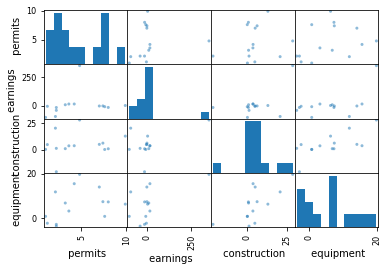

In [83]:
pd.plotting.scatter_matrix(ind_basket)
plt.show()

# Interactive Plots Using jupyter-widgets

Let's modify our function to return a scatter plot instead of a data frame. 

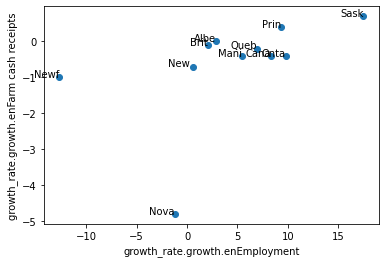

In [84]:
def plot_two_indicators(i1,i2):
    v1 = indicators[indicators['title.en'] == i1][['geo_code','growth_rate.growth.en']]
    v1['growth_rate.growth.en'] = pd.to_numeric(v1['growth_rate.growth.en'].astype('string').str.replace('%',''))
    v2 = indicators[indicators['title.en'] == i2][['geo_code','growth_rate.growth.en']]
    v2['growth_rate.growth.en'] = pd.to_numeric(v2['growth_rate.growth.en'].astype('string').str.replace('%',''))
    df = v1.merge(v2, on = 'geo_code', suffixes = (i2,i1)).merge(canada_geo, on = 'geo_code')
    cols = list(df)
    #df.plot.scatter(x = cols[1],y = cols[2])
    x1 = df[cols[2]]
    y1 = df[cols[1]]
    labs = df['region'].astype('string').str.slice(start=0,stop=4)
    fig1 = plt.subplots()
    plt.scatter(x=x1, y = y1)
    plt.xlabel(cols[2])
    plt.ylabel(cols[1])
    for i, txt in enumerate(labs):
        plt.annotate(txt, (x1[i], y1[i]), ha = 'right')
    plt.show(fig1)


plot_two_indicators(res[4],res[5])

In [86]:
import ipywidgets as widgets
from ipywidgets import interact

display(widgets.HTML(value="<h1>Select the indicators to plot</h1>"))

interact(plot_two_indicators, 
         i1 = widgets.Dropdown(options = res, value = res[0], decription = "Indicator 1"),
         i2 = widgets.Dropdown(options = res, value = res[1], decription = "Indicator 2"));

HTML(value='<h1>Select the indicators to plot</h1>')

interactive(children=(Dropdown(description='i1', options=('Average weekly earnings', 'Building permits', 'Capi…

# Plot Weekly Earnings on a Map of Canada

Let's pick 'Average weekly earnings' or `res[0]`.

Create data frame:

- group by indicator `DataFrame.groupby`
- extract groups using `get_groups`

In [87]:
groups = indicators.groupby(by=['title.en'])
weeklyearnings = groups.get_group(res[0])

In [89]:
prov_weeklyearnings = weeklyearnings.merge(canada_geo, how = 'left', on = 'geo_code')
prov_weeklyearnings['value.en']

0     $1,065.71
1     $1,170.74
2     $1,008.73
3     $1,101.08
4     $1,207.53
5     $1,111.47
6     $1,287.70
7     $1,521.11
8     $1,483.44
9       $951.01
10      $917.35
11    $1,096.33
12    $1,125.27
13    $1,014.19
Name: value.en, dtype: object

Replace `,` and `$` with `''` and convert to numeric

In [90]:
prov_weeklyearnings['value.en'] = (pd.to_numeric(prov_weeklyearnings['value.en'].
                                                 astype('string').
                                                 str.replace(r'(,|\$)','')))

<ipython-input-90-8e6890261529>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  prov_weeklyearnings['value.en'] = (pd.to_numeric(prov_weeklyearnings['value.en'].


In [91]:
# select two columns for plotting on map
prov_earnings = prov_weeklyearnings[['value.en','region']]

# drop value for Canada
prov_earnings.drop(12, axis = 0, inplace=True)

/Users/nathantaback/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


- Create a map centred on North America using `folium` library.
- create a map centred on North America

In [93]:
import folium
m = folium.Map(location=[48, -102], zoom_start=3)
m

Now create Choropleth layer that adds weekly earnings.

In [94]:
folium.Choropleth(
    geo_data=geourl, #geourl
    name="choropleth",
    data = prov_earnings,
    columns = ['region','value.en'],
    key_on = "feature.properties.name",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Weekly Earnings").add_to(m)

folium.LayerControl().add_to(m)

m